# Relatorio EP2


## Introdução

   Neste relatório examinamos três formas de movimento 2D: o Movimento de um Pêndulo Simples, O Movimento Circular em Plano Horizontal e .Tentaremos estimar, a partir do nosso conhecimento prévio sobre as caracteristicas desses movimentos, equações que modelem os dados experimentais adequadamente.
   
   Os experimentos foram realizados no laboratório de demonstrações no Instituto de Física, da seguinte maneira : Para o Pendulo, prendemos o celular na haste de um pêndulo no , e medimos sua aceleração por meio do acelerometro. Para o Plano Horizontal, prendemos uma haste de metal a uma cadeira giratória , com o celular amarrado a ponta, e medimos o tempo a cada meia volta. 
   
   Todas as medidas relevantes foram tomadas e serão apresentadas nas respectivas seções. Cada medição foi realizada repetidas, vezes como exigido no enunciado.

In [3]:
#Bibliotecas utilizadas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Pendulo Simples


## Método

   Para esse experimento, utilizamos um pêndulo já presente no laboratório. O celular foi preso na parte final no pêndulo de maneira a ficar alinhado verticalmente com a haste. As medições foram feitas ao se levantar o pêndulo em uma angulação  pré-determinada (10 graus) do repouso, que foi medida com *INSTRUMENTO DE MEDIÇÃO DE ANGULO*.
  
  Esperamos 5 segundos com o pêndulo parado na posição inclinada especial para termos uma base de comparação, soltamos o celular e deixamos o pêndulo realizar 5 oscilações, depois das quais pausamos o movimento no ponto mais baixo da oscilação, sem angulação da haste.
  
  Uma pessoa segurava o celular na posição inicial e o soltava, enquanto outra manuseava o celular e uma outra filmava o experimento.
  
  O experimento foi realizado 5 vezes, para eliminar inconsistências.

## Dados



In [4]:
names =[]
for file in glob.glob("pendulo/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)

names.sort()

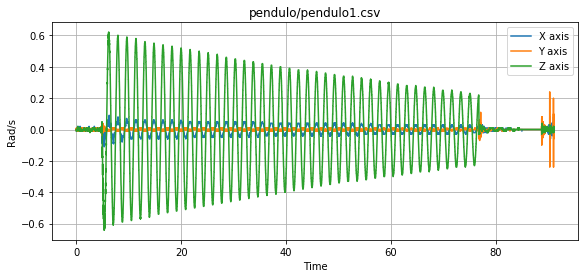

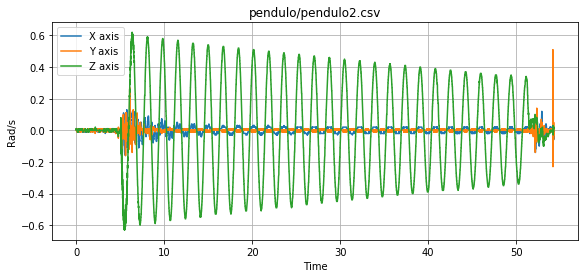

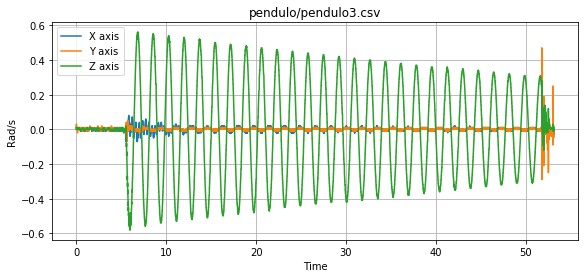

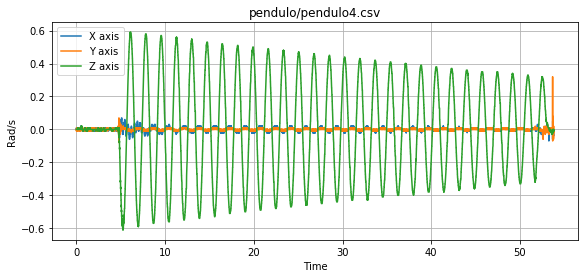

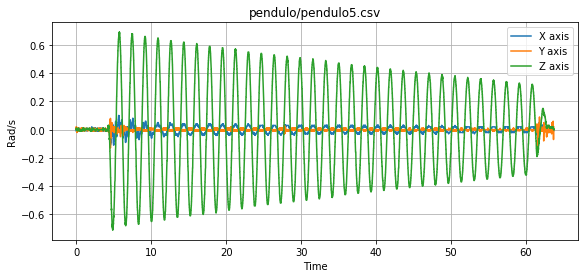

In [9]:
#Plots
for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbl.head()
    fig = plt.figure(figsize=(32,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Rad/s")
    plt.plot(tbl["time"], tbl["wx"], label = "X axis")
    plt.plot(tbl["time"], tbl["wy"], label ="Y axis")
    plt.plot(tbl["time"], tbl["wz"], label ="Z axis")
    plt.title(names[i])
    plt.legend()
    plt.show()

## Verificação

Todas as funções assumem que





## Análise

Podemos observar que a velocidade angular medida no eixo Z (representada pela linha verde nos gráficos acima) apresenta o comportamento esperado se considerarmos esse como o eio principal do movimento pendular. Podemos observar o comportamento da velocidade média do pêndulo nesse eixo . Abaixo estão os gráficos sobrepostos. 

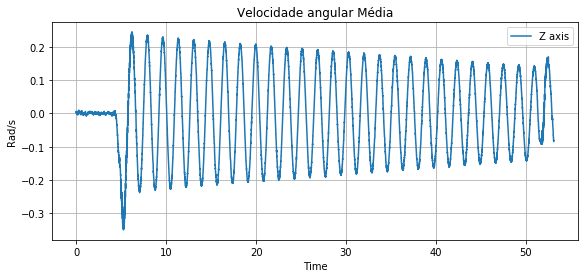

In [10]:
#leitura dos arquivos
tbls = []
for i in range(len(names)):
    tbls.append(pd.read_csv(names[i]))

#corta final do movimento para que todos tenham o mesmo comprimento
for i in range(len(tbls)):
    tbls[i] = tbls[i][:21532]

#Calcula as médias
tmed = (tbls[0]["wz"] + tbls[1]["wz"] + tbls[2]["wz"] + tbls[3]["wz"] + tbls[4]["wz"])/5

x = tbls[0]["time"]

#Plot
tmed.head()
fig = plt.figure(figsize=(32,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, tmed, label = "Z axis")
plt.title("Velocidade angular Média")
plt.legend()
plt.show()

Podemos observar que o módulo da Velocidade angular no sinal médio oscila entre extremos menores do que os encontrados nos experimentos individualmente. Isso se deve ao fato de que pequenas variações nas condições iniciais do experimento (como por exemplo no ângulo inicial exato, inclinação em relação ao eixo de movimento, etc) vão se acumulando com as oscilações, gerando diferenças grandes ao final do experimento. Esse comportamento pode ser visto no gŕafico dos sinais sobrepostos abaixo:

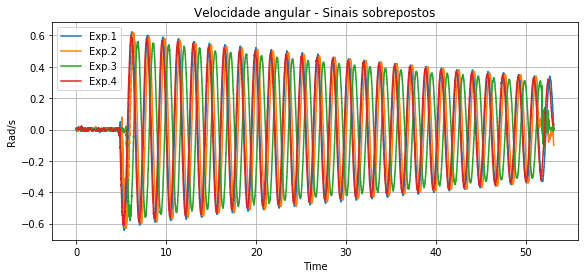

In [9]:
fig = plt.figure(figsize=(32,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, tbls[0]["wz"], label = "Exp.1")
plt.plot(x, tbls[1]["wz"], label = "Exp.2")
plt.plot(x, tbls[2]["wz"], label = "Exp.3")
plt.plot(x, tbls[3]["wz"], label = "Exp.4")
plt.title("Velocidade angular - Sinais sobrepostos")
plt.legend()
plt.show()

Alguns experimentos também possuem poluição nos dados nos últimos segundos de movimento, o que gera o pico observado no gráfico da Velocidade Angular média.

## Interpretação


# Movimento Circular em Plano Horizontal


## Método

Para esse experimento, utilizamos um banco que girava em sua própria base,já presente no laboratório. Uma haste de metal foi presa ao banco, que funcionava como uma extensão do seu raio, e o celular foi preso à ponta dessa haste. Isso foi feito para que a velocidade angular tivesse um módulo maior, e portanto suas variações fossem captadas mais fácilmente. 

As medições foram feitas ao se colocar o "braço" da cadeira sobre uma marca no chão delimitando a posição inicial, se aplicava uma força inicial que iniciava o movimento. Outra marca no chão delimitava "meia volta" a partir da primeira marca, e pessoas nessas duas marcações cronometravam quando o braço passava por essas marcas.

Esperamos 5 segundos com o braço parado na posição inclinada especial para termos uma base de comparação, e deixamos o celular concluir 3 rotações antes de interromper o movimento.

Para que a força inicial fosse sempre a mesma, amarramos um elástico em outro banco, que ficava a uma distância fixa do ponto inicial do celular, e aplicava uma força perpendicular a haste, no mesmo plano do movimento.

Uma pessoa segurava o celular na posição inicial e o soltava, enquanto outra manuseava o elástico e marcava a posição inicial, uma outra marcava a outra posição e uma outra filmava o experimento.

O experimento foi realizado 5 vezes, para eliminar inconsistências.



## Dados

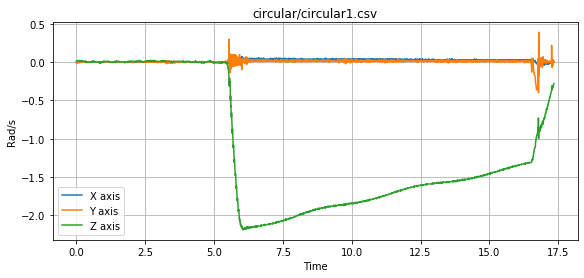

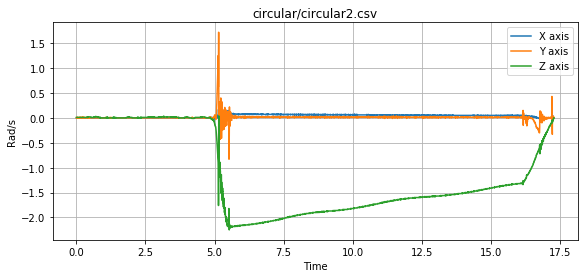

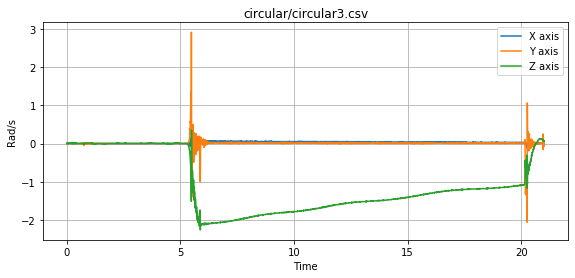

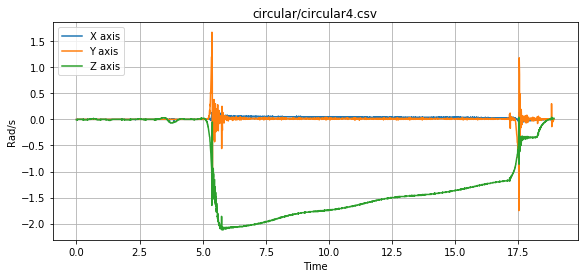

In [5]:
names = []
for file in glob.glob("circular/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)

names.sort()
i = 0

for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbl.head()
    fig = plt.figure(figsize=(32,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Rad/s")
    plt.plot(tbl["time"], tbl["wx"], label = "X axis")
    plt.plot(tbl["time"], tbl["wy"], label ="Y axis")
    plt.plot(tbl["time"], tbl["wz"], label ="Z axis")
    plt.title(names[i])
    plt.legend()
    plt.show()

## Verificação

## Análise

## Interpretação

# Descida em uma Rampa

## Método

Para esse experimento, utilizamos uma tábua que encontramos no laboratório. Elevamos uma de suas pontas criando uma rampa com o chão. Prendemos o celular a um carrinho encontrado no laboratório e o soltamos do ínicio da rampa. 

Marcamos a rampa em 3 posições, e duas pessoas marcavam o tempo que levava para a roda traseira do carrinho passava por cada uma das marcas.

Esperamos 5 segundos antes de soltar o carrinho para termos uma base de comparação, e tentamos interromper o movimento logo após o carrinho chegar ao final da rampa.

O experimento foi realizado 10 vezes para eliminar inconsistências.

## Dados

Medimos os dados utilizando o acelerometro do aplicativo

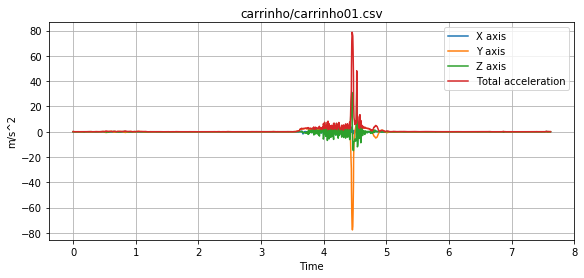

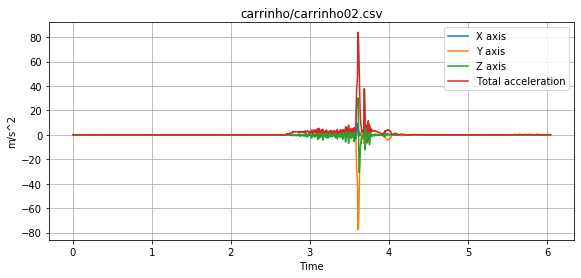

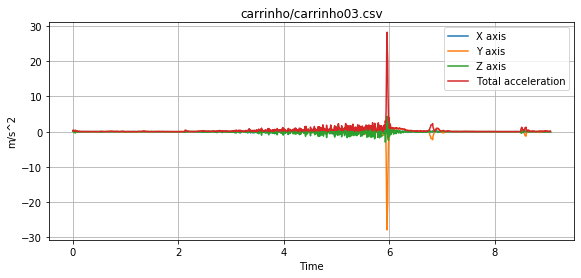

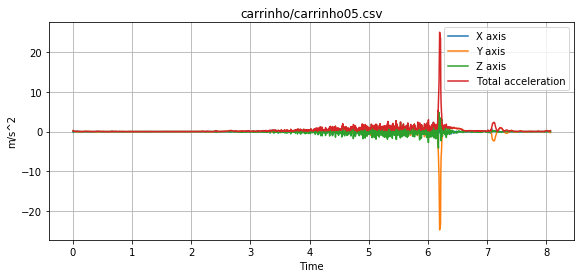

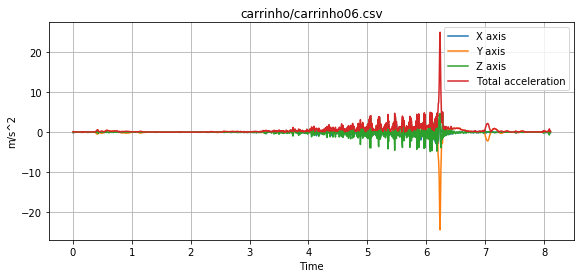

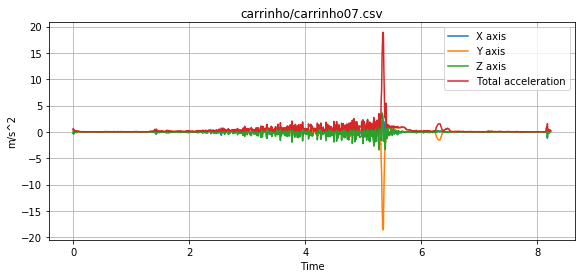

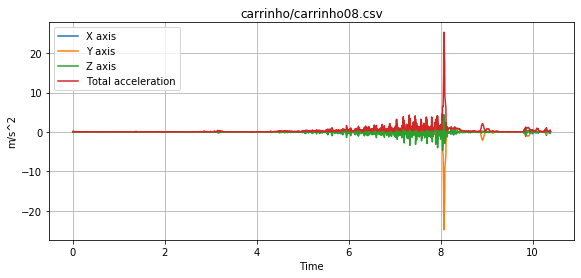

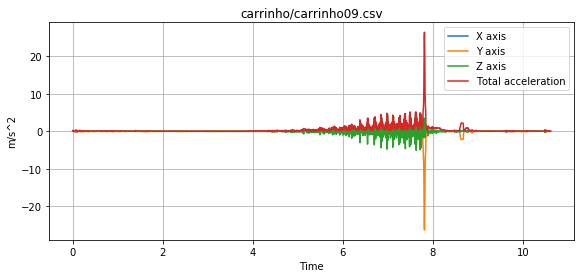

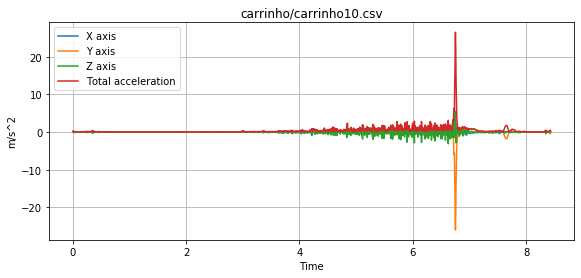

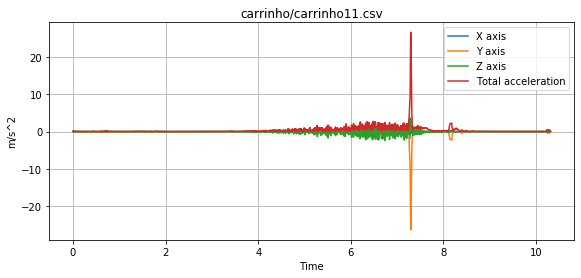

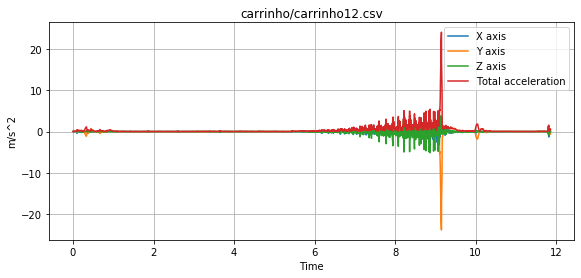

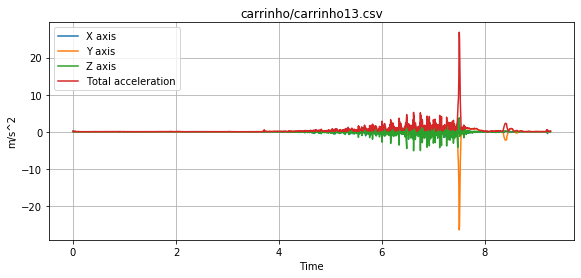

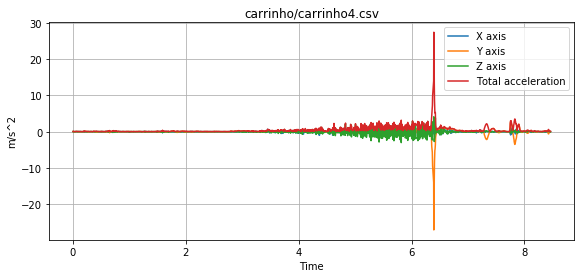

In [6]:
names = []
for file in glob.glob("carrinho/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)
names.sort()
i = 0
for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbl.head()
    fig = plt.figure(figsize=(32,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("m/s^2")
    plt.plot(tbl["time"], tbl["ax"], label = "X axis")
    plt.plot(tbl["time"], tbl["ay"], label ="Y axis")
    plt.plot(tbl["time"], tbl["az"], label ="Z axis")
    plt.plot(tbl["time"], tbl["aT"], label = "Total acceleration")
    plt.title(names[i])
    plt.legend()
    plt.show()

Analise desses dados

## Verificação

## Análise

## Interpretação

# Considerações Finais


## Crítica

   Ao fim desse experimento, aprendemos parte do que é ser um cientista de dados. Aprendemos sobre os problemas numa colheta de dados, como se preocupar com o seu ambiente de forma que não afete os seus dados de maneira indesejada e, acima disso, como modelar o experimento para que a coleta de dados seja satisfatória.
   
   No entanto, tivemos problemas para modelar o experimento de forma satisfatória : o fato do experimento ter ocorrido numa ladeira de leve inclinação e usarmos apenas 3 checkpoints contribuíram para não termos dados o bastante para que o gráfico plotado se assemelhasse com uma parábola; Como não usamos um metronômo como forma de padronizar o movimento uniforme, ele não foi de fato uniforme e nossos movimentos apresentaram oscilação na velocidade. Ademais, o modelo matemático presume um sistema isolado, no qual não há atrito e os corpos se movimentam de forma regular. Como a pista na qual fizemos o experimento apresentava irregularidades, e não conseguimos padronizar totalmente o movimento (a forma como cada integrante sobe no skate, por exemplo) o modelo não se adequa ao experimento.

   Compreendemos como utilizar ferramentas relativas a e-science como Jupyer, Pandas e matplotlib (ambas bibliotecas de Python voltadas a ciência de dados) e a interpretar resultados de um acelrômetro.
    
   O experimento foi muito interessante para uma introdução ao método cientifico de forma prática

## Log

 * Coleta de dados (Pêndulo) : 8 horas
 * Coleta de dados (Movimento Circular) : 3 horas
 * Coleta de dados (Rampa) : 3 horas
 * Análise de dados : 17 horas
 * Edição de vídeo : 15 horas

## Contribuição dos autores

Leandro Rodrigues editou o vídeo referente ao experimento, Thiago Teixeira e Caio fontes geraram os gráficos de MUV e MU (acelerômetro e dados manuais), Caio Fontes e Caio Andrade redigiram o relatório e executaram a análise dos dados.Caio Fontes, Caio Andrade e Thiago Teixeira foram o alvo do experimento do MU e MUV. Todos os autores se revezaram para gravar o vídeo do experimento. Todos os autores leram e aprovaram este relatório. Todos os autores se revezaram para anotar os dados dos cronometros manualmente.

## Link do vídeo

https://youtu.be/_E6_dLCoTiY